In [1]:
import numpy as np
from wlpy.gist import heatmap
import matplotlib.pyplot as plt

In [2]:
def normalize_covariance(S):
    D_inv = np.diag(np.diag(S) ** - 0.5)
    return D_inv @ S @ D_inv

def gen_mass(N, dof = 5, max_mass = 0.5, seed = None):
    rng = np.random.RandomState(seed) if seed else np.random
    M = rng.noncentral_chisquare(dof, False, size = N)
    # M = rng.exponential(1, size = N)
    # M = rng.uniform(0, 1, size = N)
    
    # M = np.sort(M)
    M = M / np.max(M) * max_mass
    return M

In [3]:
def gen_S_gravity(N, dof = 5, max_mass = 0.5, 
                  poly_param = [0.8, 0.5], 
                  heteroskedasticity = True, 
                  seed = None, verbose = False):
    """Generate a covariance matrix with gravity model, with diagonal elements equal to 1.
    $y = (I + b_1 G + b_2 G^2) e$ for a network matrix $G$

    Args:
        N: the dimension of the covariance matrix
        mass: the vector containing the mass of $N$ nodes

    Returns:
        covariance : a N by N covariance matrix
    """
    rng = np.random.RandomState(seed) if seed else np.random
    
    mass = gen_mass(N, dof, max_mass, seed)
    prob_of_link = np.array([[x * y for x in mass] for y in mass])
    network = rng.binomial(1, prob_of_link)
    network = network - np.diag(np.diag(network))
    pre = np.eye(N) + poly_param[0] * network + \
        poly_param[1] * (network @ network).clip(0, 1)
    cor = normalize_covariance(pre @ pre.T)
    
    if heteroskedasticity:
        sigma = rng.normal(loc = np.ones(N), scale = 0.3).clip(0.2, None)
        D = np.diag(sigma)
    else:
        D = np.ones(N) 
    cov = D @ cor @ D
        
    if verbose:
        heatmap(prob_of_link, 'prob_of_link');
        heatmap(network, 'network');
        heatmap(pre, 'pre');
        heatmap(cor, 'cor');
        heatmap(D, 'D');
        heatmap(cov, 'cov');
        
    return cov

def gen_aux_set(cov, prob, qrob, observe_level):
    P = np.random.binomial(1, prob, size = cov.shape)
    Q = np.random.binomial(1, qrob, size = cov.shape)

    GP = np.where((cov > observe_level) & (P == 1), 1, 0)
    GQ = np.where((cov <= observe_level) & (Q == 1), 1, 0)

    aux_set = GP + GQ
    return aux_set

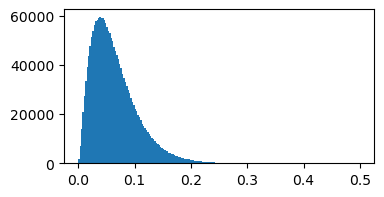

In [4]:
# Nonconcentral chisquare
mass = gen_mass(2000000, dof = 5, max_mass = 0.5)
plt.figure(figsize = (4, 2))
plt.hist(mass, bins = 200);

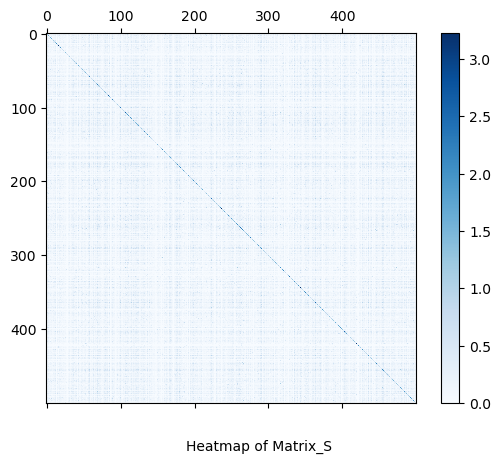

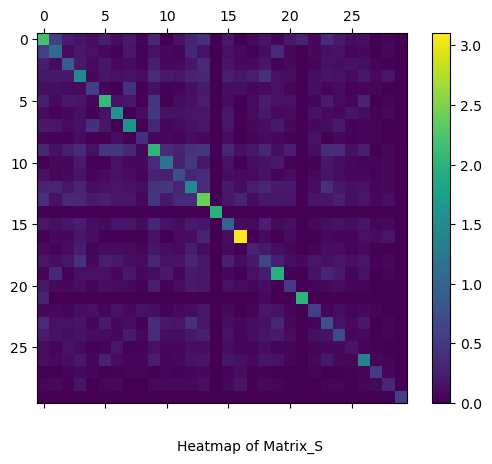

In [10]:
N = 500
S = gen_S_gravity(N, dof = 5, max_mass = 0.5, poly_param = [0.8, 0.5], verbose = False)
heatmap(S, cmap = 'Blues');
heatmap(S[:30, :30], cmap = None);

In [39]:
N = 500
T = 100
max_mass = 0.5

In [40]:
for N in [100, 300, 500]:
    for T in [100, 300, 500]:
        

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

True
True
True


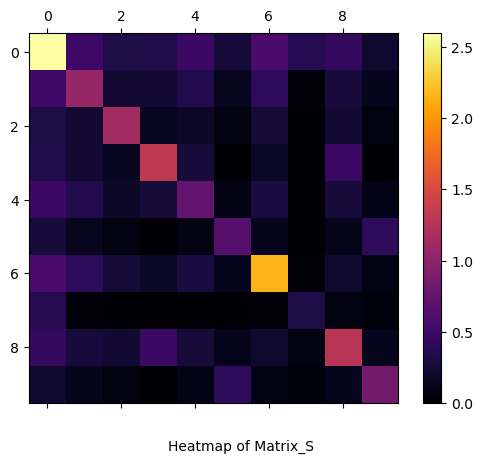

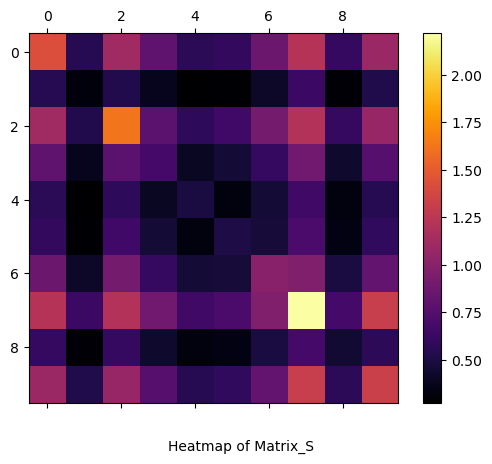

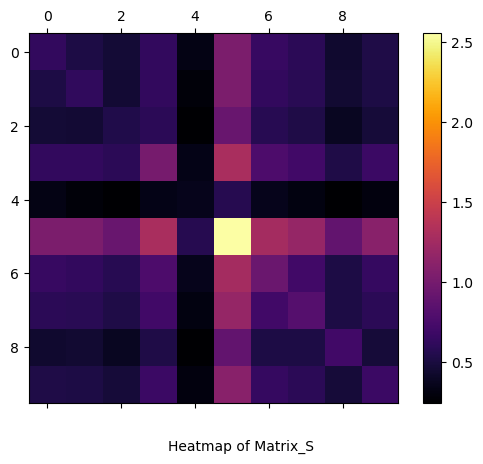

In [45]:
for max_mass in [0.5, 0.8, 0.999999]:
    mass = gen_mass(N, k = 5, max_mass = max_mass)
    S = gen_S_gravity(N, mass, poly_param = [0.8, 0.5])
    print(np.all(np.linalg.eigvals(S) > 0))
    heatmap(S[:10, :10]);
    for p in np.linspace(0, 1, 11):
        for q in np.linspace(0, 1, 11):
            for tau in np.linspace(0, 1, 11):
                pass

# ------------

In [102]:
# Test case
nsim = 2
sample_size = 500 # N by N matrix

prob = 0.8
qrob = 0.2
observe_level = 0.5

for _iter in range(nsim):
    M = mass(sample_size, k = 5, max_mass = 0.9)
    cov = gen_cov(sample_size, M, poly_param=[0.8, 0.5])
    heatmap(cov)
    heatmap(cov[0: 50, 0: 50])
    aux_set = gen_aux_set(cov, prob=prob, qrob=qrob,
                          observe_level=observe_level)
    

KeyboardInterrupt: 

In [ ]:
import numpy as np
N = 5
t_org = np.arange(N)
pi = np.random.permutation(N)
print(pi)
x_org = np.array([np.random.randn(500) * max(k, 0.5) for k in range(N)])
S_org = np.cov(x_org)
np.set_printoptions(precision = 2)
print("Covariance of sorted time steps", S_org, sep="\n")

[2 0 1 3 4]
Covariance of sorted time steps
[[ 2.59e-01  5.20e-03 -6.02e-02 -6.91e-04  7.33e-03]
 [ 5.20e-03  9.14e-01 -1.12e-02 -1.59e-02  1.36e-01]
 [-6.02e-02 -1.12e-02  4.20e+00  2.86e-02  5.15e-01]
 [-6.91e-04 -1.59e-02  2.86e-02  8.79e+00 -5.84e-01]
 [ 7.33e-03  1.36e-01  5.15e-01 -5.84e-01  1.62e+01]]


In [ ]:
print(x_org.shape)
np.cov(x_org)

(5, 500)


array([[ 2.71e-01,  1.23e-03,  1.70e-02, -2.55e-03,  7.56e-02],
       [ 1.23e-03,  9.59e-01, -1.71e-01,  1.15e-01,  3.09e-01],
       [ 1.70e-02, -1.71e-01,  4.12e+00,  2.46e-01, -1.95e-01],
       [-2.55e-03,  1.15e-01,  2.46e-01,  8.67e+00, -1.01e+00],
       [ 7.56e-02,  3.09e-01, -1.95e-01, -1.01e+00,  1.58e+01]])

In [ ]:
t_obs = t_org[pi]
print(t_org, pi, t_obs)
x_obs = x_org[pi]
S_obs = np.cov(x_obs)
print("Covariance of unsorted time steps", S_obs, sep="\n")

[0 1 2 3 4] [2 0 1 3 4] [2 0 1 3 4]
Covariance of unsorted time steps
[[ 4.20e+00 -6.02e-02 -1.12e-02  2.86e-02  5.15e-01]
 [-6.02e-02  2.59e-01  5.20e-03 -6.91e-04  7.33e-03]
 [-1.12e-02  5.20e-03  9.14e-01 -1.59e-02  1.36e-01]
 [ 2.86e-02 -6.91e-04 -1.59e-02  8.79e+00 -5.84e-01]
 [ 5.15e-01  7.33e-03  1.36e-01 -5.84e-01  1.62e+01]]


In [ ]:
# Using indexing S[p][:,p]
p = np.argsort(t_obs)
print(p)

[1 2 0 3 4]


In [ ]:
print("Reconstruction equals original:", S_obs[p][:,p] == S_org, sep="\n")

In [ ]:
# Alternative using Permutation matrix
P = np.eye(N)[p]
print("Permutation matrix", P, sep="\n")
print("Reconstruction equals original:", P@S_obs@P.T == S_org, sep="\n")

Permutation matrix
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Reconstruction equals original:
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
